<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features-Engeneering-and-Selection" data-toc-modified-id="Features-Engeneering-and-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features Engeneering and Selection</a></span><ul class="toc-item"><li><span><a href="#Split-the-Data" data-toc-modified-id="Split-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split the Data</a></span><ul class="toc-item"><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Target Encoding</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Models-For-Regression" data-toc-modified-id="Models-For-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Models For Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-Models" data-toc-modified-id="Linear-Models-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Linear Models</a></span></li><li><span><a href="#Tree-Based-Model" data-toc-modified-id="Tree-Based-Model-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Tree Based Model</a></span></li><li><span><a href="#Ensemble-Models" data-toc-modified-id="Ensemble-Models-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Ensemble Models</a></span></li><li><span><a href="#Tuninig-Lgb-model" data-toc-modified-id="Tuninig-Lgb-model-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Tuninig Lgb model</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li></ul></div>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


pd.plotting.register_matplotlib_converters()
%matplotlib inline
from IPython.display import display
from itertools import combinations
from collections import Counter


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# pre_preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler , MinMaxScaler , RobustScaler


# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Valdiation
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold , GroupKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score , median_absolute_error , mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
# to format the scientific presntastion of numbers 
pd.options.display.float_format = '{:.2f}'.format


# Features Engeneering and Selection

In [52]:
df_clean = pd.read_csv('Clean_data2.csv')

In [53]:
df_clean.head()

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,delivery_status,customer_country,customer_id,customer_segment,market,order_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,product_category_id,product_name,shipping_mode,Month_order_date_(dateorders),Year_order_date_(dateorders)
0,CASH,2,4,88.79,Advance shipping,EE. UU.,11599,Consumer,LATAM,1,60.00,0.20,1,299.98,0.37,1,299.98,43,Diamondback Women's Serene Classic Comfort Bi,Standard Class,1,2015
1,PAYMENT,3,4,68.25,Advance shipping,EE. UU.,256,Consumer,LATAM,2,22.50,0.09,3,50.00,0.30,5,250.00,24,Nike Men's Dri-FIT Victory Golf Polo,Standard Class,1,2015
2,PAYMENT,3,4,91.18,Advance shipping,EE. UU.,256,Consumer,LATAM,2,6.00,0.03,2,199.99,0.47,1,199.99,48,Pelican Sunstream 100 Kayak,Standard Class,1,2015
3,PAYMENT,3,4,36.47,Advance shipping,EE. UU.,256,Consumer,LATAM,2,22.10,0.17,4,129.99,0.34,1,129.99,18,Nike Men's CJ Elite 2 TD Football Cleat,Standard Class,1,2015
4,CASH,5,4,33.59,Late delivery,EE. UU.,8827,Home Office,LATAM,4,39.98,0.20,8,49.98,0.21,4,199.92,46,O'Brien Men's Neoprene Life Vest,Standard Class,1,2015


## Split the Data

In [54]:
train , test , y_train , y_test = train_test_split(df_clean.drop('sales',axis=1),df_clean.sales ,
                                                   test_size=0.30, shuffle=True,random_state=45)

In [55]:
train.shape,test.shape

((126021, 21), (54010, 21))

In [56]:
# The delay in orders
for df in [train,test]:
    
    df['DelayOrdered'] = df['days_for_shipment_(scheduled)'] - df['days_for_shipping_(real)']
    df.drop(['days_for_shipment_(scheduled)','days_for_shipping_(real)'], axis=1, inplace=True)



train['DiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].max()))
test['DiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].max()))


train['DenefitPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['benefit_per_order'].mean()))
test['DenefitPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['benefit_per_order'].mean()))


train['TotalDiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].var()))
test['TotalDiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].var()))


# Example 2: Compute the standard deviation of discounts per product
train['MaxDiscountPerOrder'] = train['order_item_id'].map(dict(train.groupby('order_item_id')['order_item_discount'].max()))
test['MaxDiscountPerOrder'] = test['order_item_id'].map(dict(test.groupby('order_item_id')['order_item_discount'].max()))

In [57]:
train.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)
test.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)

In [58]:
train.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)
test.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)

### Target Encoding

`Target encoding is a feature engineering technique used to handle categorical variables by encoding them based on the target variable. Instead of assigning arbitrary numerical values to categories (like in label encoding) or creating additional features (like in one-hot encoding), target encoding uses the mean of the target variable for each category as the encoded value.`

In [59]:
colms = ['product_name']
from category_encoders import TargetEncoder
Te = TargetEncoder()
for col in colms:
    train[f"{col}_mean"] = Te.fit_transform(train[f"{col}"], y_train)
    test[f"{col}_mean"] = Te.transform(test[f"{col}"])
    
    train.drop(col , axis=1, inplace=True)
    test.drop(col , axis=1, inplace=True)    

In [60]:
train['product_name_mean'].corr(y_train)

0.8377665307298386

In [61]:
cat = train.select_dtypes(include="O").columns.to_list()
num = train.select_dtypes(exclude='O').columns.to_list()

# Modeling

## Preprocessing

In [62]:
def Preprcessing(data,numerical_col,cat_clo,lable_encoder= False):
    
    if lable_encoder:
        le = LabelEncoder()
        for fea in cat:
            train[fea] = le.fit_transform(train[fea])
            test[fea] = le.transform(test[fea])

        Transformer = ColumnTransformer(
        
            transformers = [ 
        
        
            ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), numerical_col)]
            
            ,verbose_feature_names_out=False )

        data = pd.DataFrame(Transformer.fit_transform(data),columns=Transformer.get_feature_names_out())
        
        return data
    else:
        
        Transformer = ColumnTransformer(
        
            transformers = [ 
        
        
            ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), numerical_col),
        
            ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat_clo)

        ],verbose_feature_names_out=False)

        data = pd.DataFrame(Transformer.fit_transform(data),columns=Transformer.get_feature_names_out())
        
        return data

In [63]:
train_df = Preprcessing(train,numerical_col=num,cat_clo=cat,lable_encoder=True)

## Models For Regression

### Linear Models

1. Linear Reggression(OLS)
2. Ridge Reggression(L1 norm)
3. Lasso Reggression(L2 norm)
4. Elistic Net

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,PolynomialFeatures
from imblearn.pipeline import Pipeline

Linear_models = {
    
    "Linear Regression" : LinearRegression(),
    "Rideg" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet": ElasticNet()
}

# Linear_processer = ColumnTransformer(
    
    
#     transformers = [ 
    
    
#         ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num),
    
#         ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat)
        
    
#                                                                                 ])

# Evaluate Each Model
for name, model in Linear_models.items():
    
    # Create Pipeline
    
    pipeline = Pipeline(steps=[

        ("model", model)
    ])

  
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")


Model: Linear Regression
Cross-Validation RMSE: 26.70 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Rideg
Cross-Validation RMSE: 26.70 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Lasso
Cross-Validation RMSE: 26.99 (+/- 0.18)
Cross-Validation MAE: 4.31 (+/- 0.01)
Cross-Validation R2_score : 0.944

Model: ElasticNet
Cross-Validation RMSE: 42.55 (+/- 0.15)
Cross-Validation MAE: 5.62 (+/- 0.01)
Cross-Validation R2_score : 0.862



### Tree Based Model

1. Decision Tree
2. Gradint Boosting  
3. Extra Trees


        I's Known that most of the tree models were likely to overfit without any tunnig so here we adjust some parameters for meaningful results

In [65]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor,ExtraTreesRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


tree_models = {
    
    "LightGBM": LGBMRegressor(n_estimators = 200, random_state = 45, learning_rate = 0.01 ),
    
    "Decision Tree": DecisionTreeRegressor(random_state=45,max_depth=5)
    
}

tree_processer = ColumnTransformer(transformers=[
    
    
        ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num)
    
        # ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat) 
        ])

# Evaluate Each Model
for name, model in tree_models.items():
    
    # Create Pipeline
    pipeline = Pipeline(steps=[
        
        ("Processre" , tree_processer ),
                
        ("model", model)
    ])
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 11
[LightGBM] [Info] Start training from score 200.341686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100817, number of used features: 11
[LightGBM] [Info] Start training from score 200.463444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

### Ensemble Models

1. Stacking

In [66]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR


estimators = [
    
    ('lr', LinearRegression()),
    ('lgbm',  DecisionTreeRegressor(random_state=45,max_depth=5))]

StackModels = StackingRegressor(
    
    estimators=estimators,
    
    final_estimator= Lasso() 
)

pipeline = Pipeline(steps=[
    
    ('preprocessor', tree_processer),
    
    ("Model", StackModels)
])


# Cross-Validation
scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
rmse_scores = np.sqrt(-scores)
    
MAE_scores = np.sqrt(-scores2)
    
R2_score = np.mean(scores3)
    

print(f"Model: StackModels")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

Model: StackModels
Cross-Validation RMSE: 15.04 (+/- 0.14)
Cross-Validation MAE: 3.31 (+/- 0.01)
Cross-Validation R2_score : 0.983



**The above Resultes shows that the problem could have different solutions. Alought we gonna choose the LIGHT GBM Model since it's fast and good with momery and deployed**

# Hyperparameter Tunning

In [68]:
# Split the training data to train and validation
X_train , X_valid , train_y , valid_y = train_test_split(train , y_train, test_size=0.25 ,shuffle=True, random_state = 42)

X_train = Preprcessing(X_train,num,cat,lable_encoder=True)
X_valid =  Preprcessing(X_valid,num,cat,lable_encoder=True)

### Halving Gride Search

In [19]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV,HalvingGridSearchCV


# Model=  LGBMRegressor(random_state=45)

# # Define the parameter space
# param_dist = {
#     'learning_rate': [0.01],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [5],
#     'min_child_samples': [10, 20, 50,100],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [100, 200, 300],
#     'bagging_freq':[5],
#     'bagging_fraction':[0.75,0.85]
    
# }

# # Set up HalvingRandomSearchCV
# halving_search = HalvingRandomSearchCV(
#     estimator=Model,
#     param_distributions=param_dist,
#     resource='n_samples',
#     aggressive_elimination=True,
#     max_resources=400,  # Maximum number of estimators to test
#     random_state=42,
#     scoring='neg_root_mean_squared_error',  # Evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,  # Display progress
#     n_jobs=-1  # Parallelize
# )


# # Perform the search
# halving_search.fit(Train, y_train)

# #  Display the best parameters
# print("Best Parameters:", halving_search.best_params_)
# print("Best score:", halving_search.best_score_)

In [20]:
# params = {'bagging_fraction': 0.5,
#           'bagging_freq': 2,
#           'colsample_bytree': 1.0, 
#           'learning_rate': 0.01,
#           'max_depth': 5,
#           'min_child_samples': 10, 
#           'n_estimators': 300,
#           'num_leaves': 31}4

### Optuna

In [ ]:
# import optuna
# import lightgbm as lgb
# from lightgbm import early_stopping
# from lightgbm import log_evaluation

# dtrain = lgb.Dataset(X_train , label = train_y)
# dvalid = lgb.Dataset(X_valid , label = valid_y)


# # Define objective function
# def objective(trial):
#     # Define hyperparameter search space
#     params = {
#         "objective": "regression",
#         "metric": "rmse",
#         "num_leaves": trial.suggest_int("num_leaves", 10, 200),
#         "max_depth": trial.suggest_int("max_depth", 1, 5),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 0.1),
#         "n_estimators": trial.suggest_int("n_estimators", 50, 400),
#         # "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
#         # "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),  # Include bagging_fraction
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#         "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
#         "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
#     }
        
#     # Train LightGBM model
#     model = lgb.train(params,
#             train_set=dtrain,
#             num_boost_round=200,
#             valid_sets=[dtrain, dvalid],
#             callbacks=[early_stopping(100), log_evaluation(100)])

#     # Predict and calculate RMSE
#     preds = model.predict(X_valid)
#     rmse = mean_squared_error(valid_y, preds, squared=False)
#     return rmse

# # Create a study and optimize
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=50)

# # Get the best parameters
# print("Best parameters:", study.best_params)
# print("Best RMSE:", study.best_value)


[I 2025-01-24 15:19:39,656] A new study created in memory with name: no-name-17615c11-40b7-4a59-a1de-8136dedb28c1


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 94515, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Info] Start training from score 200.442770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until

[I 2025-01-24 15:19:41,395] Trial 0 finished with value: 102.43223034666912 and parameters: {'num_leaves': 192, 'max_depth': 2, 'learning_rate': 0.0006209049997852204, 'n_estimators': 254, 'colsample_bytree': 0.704414013438295, 'feature_fraction': 0.8595602294006475, 'bagging_fraction': 0.9219220906855152, 'bagging_freq': 3, 'reg_alpha': 0.00046390551305743125, 'reg_lambda': 0.0595678604487719}. Best is trial 0 with value: 102.43223034666912.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.5662227236435178, colsample_bytree=0.8862469367057645 will be ignored. Current value: feature_fraction=0.5662227236435178
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.5662227236435178, colsample_bytree=0.8862469367057645 will be ignored. Current value: feature_fraction=0.5662227236435178
[LightGBM] [Warning] feature_fraction is set=0.5662227236435178, colsample_bytree=0.8862469367057645 will be ignored. Current value: feature_fraction=0.5662227236435178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:19:45,082] Trial 1 finished with value: 8.734476996763807 and parameters: {'num_leaves': 144, 'max_depth': 5, 'learning_rate': 0.018980760827361092, 'n_estimators': 359, 'colsample_bytree': 0.8862469367057645, 'feature_fraction': 0.5662227236435178, 'bagging_fraction': 0.588552867591598, 'bagging_freq': 9, 'reg_alpha': 1.3286393387635631e-07, 'reg_lambda': 0.0010965583400927292}. Best is trial 1 with value: 8.734476996763807.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.787217112598256, colsample_bytree=0.9724856892043103 will be ignored. Current value: feature_fraction=0.787217112598256
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.787217112598256, colsample_bytree=0.9724856892043103 will be ignored. Current value: feature_fraction=0.787217112598256
[LightGBM] [Warning] feature_fraction is set=0.787217112598256, colsample_bytree=0.9724856892043103 will be ignored. Current value: feature_fraction=0.787217112598256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003265 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:19:47,398] Trial 2 finished with value: 48.9979024320522 and parameters: {'num_leaves': 106, 'max_depth': 3, 'learning_rate': 0.0038427558425376145, 'n_estimators': 308, 'colsample_bytree': 0.9724856892043103, 'feature_fraction': 0.787217112598256, 'bagging_fraction': 0.5904533086650177, 'bagging_freq': 3, 'reg_alpha': 1.190660447581084e-05, 'reg_lambda': 1.3528380033069906e-08}. Best is trial 1 with value: 8.734476996763807.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.801537046193268, colsample_bytree=0.9068022284483163 will be ignored. Current value: feature_fraction=0.801537046193268
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.801537046193268, colsample_bytree=0.9068022284483163 will be ignored. Current value: feature_fraction=0.801537046193268
[LightGBM] [Warning] feature_fraction is set=0.801537046193268, colsample_bytree=0.9068022284483163 will be ignored. Current value: feature_fraction=0.801537046193268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:19:49,834] Trial 3 finished with value: 7.84836644086742 and parameters: {'num_leaves': 145, 'max_depth': 5, 'learning_rate': 0.013860950380674208, 'n_estimators': 215, 'colsample_bytree': 0.9068022284483163, 'feature_fraction': 0.801537046193268, 'bagging_fraction': 0.817916856762867, 'bagging_freq': 8, 'reg_alpha': 0.08341535766265382, 'reg_lambda': 2.2039707841249813e-08}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9308242329612197, colsample_bytree=0.764124598205518 will be ignored. Current value: feature_fraction=0.9308242329612197
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9308242329612197, colsample_bytree=0.764124598205518 will be ignored. Current value: feature_fraction=0.9308242329612197
[LightGBM] [Warning] feature_fraction is set=0.9308242329612197, colsample_bytree=0.764124598205518 will be ignored. Current value: feature_fraction=0.9308242329612197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead

[I 2025-01-24 15:19:51,567] Trial 4 finished with value: 19.625840837398222 and parameters: {'num_leaves': 91, 'max_depth': 2, 'learning_rate': 0.02352307146111169, 'n_estimators': 352, 'colsample_bytree': 0.764124598205518, 'feature_fraction': 0.9308242329612197, 'bagging_fraction': 0.7113023843328202, 'bagging_freq': 7, 'reg_alpha': 1.793317260229101e-05, 'reg_lambda': 0.27426062216025054}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.6785584725219236, colsample_bytree=0.8272196619615899 will be ignored. Current value: feature_fraction=0.6785584725219236
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.6785584725219236, colsample_bytree=0.8272196619615899 will be ignored. Current value: feature_fraction=0.6785584725219236
[LightGBM] [Warning] feature_fraction is set=0.6785584725219236, colsample_bytree=0.8272196619615899 will be ignored. Current value: feature_fraction=0.6785584725219236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:19:52,479] Trial 5 finished with value: 74.35036758155738 and parameters: {'num_leaves': 113, 'max_depth': 4, 'learning_rate': 0.00400047258912337, 'n_estimators': 128, 'colsample_bytree': 0.8272196619615899, 'feature_fraction': 0.6785584725219236, 'bagging_fraction': 0.6145117063082288, 'bagging_freq': 1, 'reg_alpha': 0.35435006494772103, 'reg_lambda': 0.0005199531019186551}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.5309747474126318, colsample_bytree=0.5062890614042119 will be ignored. Current value: feature_fraction=0.5309747474126318
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.5309747474126318, colsample_bytree=0.5062890614042119 will be ignored. Current value: feature_fraction=0.5309747474126318
[LightGBM] [Warning] feature_fraction is set=0.5309747474126318, colsample_bytree=0.5062890614042119 will be ignored. Current value: feature_fraction=0.5309747474126318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015918 seconds.
You can set `force_col_wise=true` to remove the overh

[I 2025-01-24 15:19:52,824] Trial 6 finished with value: 113.37819822722714 and parameters: {'num_leaves': 98, 'max_depth': 3, 'learning_rate': 0.00015090606734093564, 'n_estimators': 52, 'colsample_bytree': 0.5062890614042119, 'feature_fraction': 0.5309747474126318, 'bagging_fraction': 0.9419036395013753, 'bagging_freq': 1, 'reg_alpha': 1.2064996059443197e-08, 'reg_lambda': 1.8729197002603506}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 15:19:53,584] Trial 7 finished with value: 103.2853228162489 and parameters: {'num_leaves': 98, 'max_depth': 1, 'learning_rate': 0.0007772918305802741, 'n_estimators': 249, 'colsample_bytree': 0.8871302420525525, 'feature_fraction': 0.9153993648608769, 'bagging_fraction': 0.5084259385541401, 'bagging_freq': 6, 'reg_alpha': 1.2165847512454606, 'reg_lambda': 0.003982416091681533}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8764639416050839, colsample_bytree=0.8390239292930304 will be ignored. Current value: feature_fraction=0.8764639416050839
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8764639416050839, colsample_bytree=0.8390239292930304 will be ignored. Current value: feature_fraction=0.8764639416050839
[LightGBM] [Warning] feature_fraction is set=0.8764639416050839, colsample_bytree=0.8390239292930304 will be ignored. Current value: feature_fraction=0.8764639416050839
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007854 seconds.
You can set `force_col_wise=true` to remove the overh

[I 2025-01-24 15:19:54,465] Trial 8 finished with value: 101.38362709567622 and parameters: {'num_leaves': 62, 'max_depth': 2, 'learning_rate': 0.001162946195536811, 'n_estimators': 148, 'colsample_bytree': 0.8390239292930304, 'feature_fraction': 0.8764639416050839, 'bagging_fraction': 0.8460501010832316, 'bagging_freq': 3, 'reg_alpha': 0.049025221941117476, 'reg_lambda': 1.6327706401081907e-05}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.6646087860061558, colsample_bytree=0.8020527868704943 will be ignored. Current value: feature_fraction=0.6646087860061558
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.6646087860061558, colsample_bytree=0.8020527868704943 will be ignored. Current value: feature_fraction=0.6646087860061558
[LightGBM] [Warning] feature_fraction is set=0.6646087860061558, colsample_bytree=0.8020527868704943 will be ignored. Current value: feature_fraction=0.6646087860061558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:19:57,905] Trial 9 finished with value: 78.19630054013294 and parameters: {'num_leaves': 63, 'max_depth': 5, 'learning_rate': 0.0013844220807850164, 'n_estimators': 305, 'colsample_bytree': 0.8020527868704943, 'feature_fraction': 0.6646087860061558, 'bagging_fraction': 0.8106727215359988, 'bagging_freq': 2, 'reg_alpha': 2.2542927484473446e-07, 'reg_lambda': 0.06526802334989548}. Best is trial 3 with value: 7.84836644086742.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9905034489118525, colsample_bytree=0.6627512942384981 will be ignored. Current value: feature_fraction=0.9905034489118525
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9905034489118525, colsample_bytree=0.6627512942384981 will be ignored. Current value: feature_fraction=0.9905034489118525
[LightGBM] [Warning] feature_fraction is set=0.9905034489118525, colsample_bytree=0.6627512942384981 will be ignored. Current value: feature_fraction=0.9905034489118525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:19:59,214] Trial 10 finished with value: 1.8424642489019372 and parameters: {'num_leaves': 10, 'max_depth': 4, 'learning_rate': 0.09000407470477248, 'n_estimators': 173, 'colsample_bytree': 0.6627512942384981, 'feature_fraction': 0.9905034489118525, 'bagging_fraction': 0.7303077483550781, 'bagging_freq': 10, 'reg_alpha': 0.0017231051326265516, 'reg_lambda': 2.863145805081933e-08}. Best is trial 10 with value: 1.8424642489019372.


Did not meet early stopping. Best iteration is:
[170]	training's rmse: 1.03306	valid_1's rmse: 1.84246
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9835961138266129, colsample_bytree=0.6473060533898081 will be ignored. Current value: feature_fraction=0.9835961138266129
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9835961138266129, colsample_bytree=0.6473060533898081 will be ignored. Current value: feature_fraction=0.9835961138266129
[LightGBM] [Warning] feature_fraction is set=0.9835961138266129, colsample_bytree=0.6473060533898081 will be ignored. Current value: feature_fraction=0.9835961138266129
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

[I 2025-01-24 15:20:01,028] Trial 11 finished with value: 2.7422222194131627 and parameters: {'num_leaves': 16, 'max_depth': 4, 'learning_rate': 0.07844666069924522, 'n_estimators': 178, 'colsample_bytree': 0.6473060533898081, 'feature_fraction': 0.9835961138266129, 'bagging_fraction': 0.7340294147757648, 'bagging_freq': 10, 'reg_alpha': 0.004647105595364185, 'reg_lambda': 1.0323063104005268e-08}. Best is trial 10 with value: 1.8424642489019372.


Did not meet early stopping. Best iteration is:
[152]	training's rmse: 0.817435	valid_1's rmse: 2.74222
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9968360628622853, colsample_bytree=0.618813552413953 will be ignored. Current value: feature_fraction=0.9968360628622853
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9968360628622853, colsample_bytree=0.618813552413953 will be ignored. Current value: feature_fraction=0.9968360628622853
[LightGBM] [Warning] feature_fraction is set=0.9968360628622853, colsample_bytree=0.618813552413953 will be ignored. Current value: feature_fraction=0.9968360628622853
[LightGBM] [Info] Auto-choosing row-wise multi-threading

[I 2025-01-24 15:20:02,363] Trial 12 finished with value: 3.7747571673624294 and parameters: {'num_leaves': 16, 'max_depth': 4, 'learning_rate': 0.0921120330912605, 'n_estimators': 166, 'colsample_bytree': 0.618813552413953, 'feature_fraction': 0.9968360628622853, 'bagging_fraction': 0.7144897919281258, 'bagging_freq': 10, 'reg_alpha': 0.0022818087010797023, 'reg_lambda': 9.740735103778133e-07}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[88]	training's rmse: 1.07049	valid_1's rmse: 3.77476
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsampl

[I 2025-01-24 15:20:03,155] Trial 13 finished with value: 2.407307186475544 and parameters: {'num_leaves': 11, 'max_depth': 4, 'learning_rate': 0.09784393269435697, 'n_estimators': 92, 'colsample_bytree': 0.6489700208522633, 'feature_fraction': 0.9912675937193332, 'bagging_fraction': 0.6783734348122737, 'bagging_freq': 10, 'reg_alpha': 0.005036608892491333, 'reg_lambda': 6.457939107938576e-07}. Best is trial 10 with value: 1.8424642489019372.


Did not meet early stopping. Best iteration is:
[73]	training's rmse: 1.61856	valid_1's rmse: 2.40731
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.995295226154651, colsample_bytree=0.5596899257931378 will be ignored. Current value: feature_fraction=0.995295226154651
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.995295226154651, colsample_bytree=0.5596899257931378 will be ignored. Current value: feature_fraction=0.995295226154651
[LightGBM] [Warning] feature_fraction is set=0.995295226154651, colsample_bytree=0.5596899257931378 will be ignored. Current value: feature_fraction=0.995295226154651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the

[I 2025-01-24 15:20:03,988] Trial 14 finished with value: 6.601211858418381 and parameters: {'num_leaves': 43, 'max_depth': 4, 'learning_rate': 0.04131356457348398, 'n_estimators': 84, 'colsample_bytree': 0.5596899257931378, 'feature_fraction': 0.995295226154651, 'bagging_fraction': 0.659124286464326, 'bagging_freq': 8, 'reg_alpha': 5.053864905576277e-05, 'reg_lambda': 1.4680842064493635e-06}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8529000265159372, colsample_bytree=0.6891207856596766 will be ignored. Current value: feature_fraction=0.8529000265159372
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8529000265159372, colsample_bytree=0.6891207856596766 will be ignored. Current value: feature_fraction=0.8529000265159372
[LightGBM] [Warning] feature_fraction is set=0.8529000265159372, colsample_bytree=0.6891207856596766 will be ignored. Current value: feature_fraction=0.8529000265159372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:04,744] Trial 15 finished with value: 59.90840752560822 and parameters: {'num_leaves': 38, 'max_depth': 3, 'learning_rate': 0.008715475922131703, 'n_estimators': 99, 'colsample_bytree': 0.6891207856596766, 'feature_fraction': 0.8529000265159372, 'bagging_fraction': 0.6617991413345983, 'bagging_freq': 5, 'reg_alpha': 0.009030694377767285, 'reg_lambda': 3.870920979844372e-07}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.711202596903515, colsample_bytree=0.5991335686642786 will be ignored. Current value: feature_fraction=0.711202596903515
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.711202596903515, colsample_bytree=0.5991335686642786 will be ignored. Current value: feature_fraction=0.711202596903515
[LightGBM] [Warning] feature_fraction is set=0.711202596903515, colsample_bytree=0.5991335686642786 will be ignored. Current value: feature_fraction=0.711202596903515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

[I 2025-01-24 15:20:06,145] Trial 16 finished with value: 7.6459858970506005 and parameters: {'num_leaves': 10, 'max_depth': 4, 'learning_rate': 0.04274274292159876, 'n_estimators': 191, 'colsample_bytree': 0.5991335686642786, 'feature_fraction': 0.711202596903515, 'bagging_fraction': 0.5026575344272757, 'bagging_freq': 9, 'reg_alpha': 9.861874646062336, 'reg_lambda': 2.783952385436814e-05}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9356829798548985, colsample_bytree=0.7096514843389181 will be ignored. Current value: feature_fraction=0.9356829798548985
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9356829798548985, colsample_bytree=0.7096514843389181 will be ignored. Current value: feature_fraction=0.9356829798548985
[LightGBM] [Warning] feature_fraction is set=0.9356829798548985, colsample_bytree=0.7096514843389181 will be ignored. Current value: feature_fraction=0.9356829798548985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005772 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:07,472] Trial 17 finished with value: 48.99662025108049 and parameters: {'num_leaves': 39, 'max_depth': 5, 'learning_rate': 0.007866692006326698, 'n_estimators': 112, 'colsample_bytree': 0.7096514843389181, 'feature_fraction': 0.9356829798548985, 'bagging_fraction': 0.7737270837145206, 'bagging_freq': 5, 'reg_alpha': 0.0009687712554727518, 'reg_lambda': 2.9425384187362225e-07}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[112]	training's rmse: 49.4139	valid_1's rmse: 48.9966
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8025781953204723, colsample_bytree=0.5493900566914205 will be ignored. Current value: feature_fraction=0.8025781953204723
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8025781953204723, colsample_bytree=0.5493900566914205 will be ignored. Current value: feature_fraction=0.802578195320472

[I 2025-01-24 15:20:08,106] Trial 18 finished with value: 12.378050543267394 and parameters: {'num_leaves': 69, 'max_depth': 4, 'learning_rate': 0.05324226188910782, 'n_estimators': 50, 'colsample_bytree': 0.5493900566914205, 'feature_fraction': 0.8025781953204723, 'bagging_fraction': 0.8823185175714992, 'bagging_freq': 10, 'reg_alpha': 9.773199027117505e-05, 'reg_lambda': 3.342812198363759e-05}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[50]	training's rmse: 12.7345	valid_1's rmse: 12.3781
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.5989808758745723, colsample_bytree=0.7473745663624365 will be ignored. Current value: feature_fraction=0.5989808758745723
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warnin

[I 2025-01-24 15:20:09,710] Trial 19 finished with value: 112.17620812392106 and parameters: {'num_leaves': 30, 'max_depth': 3, 'learning_rate': 0.00010024075006533565, 'n_estimators': 209, 'colsample_bytree': 0.7473745663624365, 'feature_fraction': 0.5989808758745723, 'bagging_fraction': 0.981577453483288, 'bagging_freq': 7, 'reg_alpha': 2.167224404655063e-06, 'reg_lambda': 8.118708405215168e-08}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.938080744389113, colsample_bytree=0.6269542721411805 will be ignored. Current value: feature_fraction=0.938080744389113
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.938080744389113, colsample_bytree=0.6269542721411805 will be ignored. Current value: feature_fraction=0.938080744389113
[LightGBM] [Warning] feature_fraction is set=0.938080744389113, colsample_bytree=0.6269542721411805 will be ignored. Current value: feature_fraction=0.938080744389113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:20:10,686] Trial 20 finished with value: 10.211570931064992 and parameters: {'num_leaves': 199, 'max_depth': 3, 'learning_rate': 0.030603509758266336, 'n_estimators': 134, 'colsample_bytree': 0.6269542721411805, 'feature_fraction': 0.938080744389113, 'bagging_fraction': 0.6746579453609797, 'bagging_freq': 9, 'reg_alpha': 0.03880924269090219, 'reg_lambda': 4.290205485844811e-06}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9991070163939717, colsample_bytree=0.6659370946582802 will be ignored. Current value: feature_fraction=0.9991070163939717
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9991070163939717, colsample_bytree=0.6659370946582802 will be ignored. Current value: feature_fraction=0.9991070163939717
[LightGBM] [Warning] feature_fraction is set=0.9991070163939717, colsample_bytree=0.6659370946582802 will be ignored. Current value: feature_fraction=0.9991070163939717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:12,054] Trial 21 finished with value: 3.0434103303211337 and parameters: {'num_leaves': 22, 'max_depth': 4, 'learning_rate': 0.09064335908378099, 'n_estimators': 167, 'colsample_bytree': 0.6659370946582802, 'feature_fraction': 0.9991070163939717, 'bagging_fraction': 0.7520336089767781, 'bagging_freq': 10, 'reg_alpha': 0.0029999178287696995, 'reg_lambda': 7.884190756304992e-08}. Best is trial 10 with value: 1.8424642489019372.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9596887170199138, colsample_bytree=0.6530221239065903 will be ignored. Current value: feature_fraction=0.9596887170199138
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9596887170199138, colsample_bytree=0.6530221239065903 will be ignored. Current value: feature_fraction=0.9596887170199138
[LightGBM] [Warning] feature_fraction is set=0.9596887170199138, colsample_bytree=0.6530221239065903 will be ignored. Current value: feature_fraction=0.9596887170199138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:13,431] Trial 22 finished with value: 1.7460348988773386 and parameters: {'num_leaves': 10, 'max_depth': 4, 'learning_rate': 0.09097954861726347, 'n_estimators': 181, 'colsample_bytree': 0.6530221239065903, 'feature_fraction': 0.9596887170199138, 'bagging_fraction': 0.718970019490883, 'bagging_freq': 10, 'reg_alpha': 0.012225878324953162, 'reg_lambda': 1.153956189799547e-08}. Best is trial 22 with value: 1.7460348988773386.


Did not meet early stopping. Best iteration is:
[178]	training's rmse: 0.849489	valid_1's rmse: 1.74603
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8976343012585871, colsample_bytree=0.5788316030263166 will be ignored. Current value: feature_fraction=0.8976343012585871
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8976343012585871, colsample_bytree=0.5788316030263166 will be ignored. Current value: feature_fraction=0.8976343012585871
[LightGBM] [Warning] feature_fraction is set=0.8976343012585871, colsample_bytree=0.5788316030263166 will be ignored. Current value: feature_fraction=0.8976343012585871
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[I 2025-01-24 15:20:16,187] Trial 23 finished with value: 1.365733005440223 and parameters: {'num_leaves': 54, 'max_depth': 5, 'learning_rate': 0.05479892837067357, 'n_estimators': 233, 'colsample_bytree': 0.5788316030263166, 'feature_fraction': 0.8976343012585871, 'bagging_fraction': 0.7803684395207938, 'bagging_freq': 8, 'reg_alpha': 0.00025338019131521556, 'reg_lambda': 1.1010242698131672e-07}. Best is trial 23 with value: 1.365733005440223.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9050156812832094, colsample_bytree=0.5916573001887973 will be ignored. Current value: feature_fraction=0.9050156812832094
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9050156812832094, colsample_bytree=0.5916573001887973 will be ignored. Current value: feature_fraction=0.9050156812832094
[LightGBM] [Warning] feature_fraction is set=0.9050156812832094, colsample_bytree=0.5916573001887973 will be ignored. Current value: feature_fraction=0.9050156812832094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:19,130] Trial 24 finished with value: 0.9296354599154452 and parameters: {'num_leaves': 50, 'max_depth': 5, 'learning_rate': 0.05200193112379683, 'n_estimators': 269, 'colsample_bytree': 0.5916573001887973, 'feature_fraction': 0.9050156812832094, 'bagging_fraction': 0.7929839368626792, 'bagging_freq': 8, 'reg_alpha': 0.0003319626481794578, 'reg_lambda': 8.869436831811163e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.890098823892081, colsample_bytree=0.5756788044648602 will be ignored. Current value: feature_fraction=0.890098823892081
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.890098823892081, colsample_bytree=0.5756788044648602 will be ignored. Current value: feature_fraction=0.890098823892081
[LightGBM] [Warning] feature_fraction is set=0.890098823892081, colsample_bytree=0.5756788044648602 will be ignored. Current value: feature_fraction=0.890098823892081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:20:22,105] Trial 25 finished with value: 8.756071333550286 and parameters: {'num_leaves': 52, 'max_depth': 5, 'learning_rate': 0.010336611154507716, 'n_estimators': 258, 'colsample_bytree': 0.5756788044648602, 'feature_fraction': 0.890098823892081, 'bagging_fraction': 0.7853903794136187, 'bagging_freq': 8, 'reg_alpha': 0.00018180100336669542, 'reg_lambda': 1.4368630876015332e-07}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8311222284636985, colsample_bytree=0.5225308050913712 will be ignored. Current value: feature_fraction=0.8311222284636985
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8311222284636985, colsample_bytree=0.5225308050913712 will be ignored. Current value: feature_fraction=0.8311222284636985
[LightGBM] [Warning] feature_fraction is set=0.8311222284636985, colsample_bytree=0.5225308050913712 will be ignored. Current value: feature_fraction=0.8311222284636985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:25,497] Trial 26 finished with value: 2.8102241308219496 and parameters: {'num_leaves': 82, 'max_depth': 5, 'learning_rate': 0.0449403595786117, 'n_estimators': 300, 'colsample_bytree': 0.5225308050913712, 'feature_fraction': 0.8311222284636985, 'bagging_fraction': 0.8682624165838029, 'bagging_freq': 7, 'reg_alpha': 3.2805713528938157e-06, 'reg_lambda': 2.3964955662798432e-06}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.7625079757817115, colsample_bytree=0.5941805499244387 will be ignored. Current value: feature_fraction=0.7625079757817115
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.7625079757817115, colsample_bytree=0.5941805499244387 will be ignored. Current value: feature_fraction=0.7625079757817115
[LightGBM] [Warning] feature_fraction is set=0.7625079757817115, colsample_bytree=0.5941805499244387 will be ignored. Current value: feature_fraction=0.7625079757817115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:28,972] Trial 27 finished with value: 6.902778382587765 and parameters: {'num_leaves': 121, 'max_depth': 5, 'learning_rate': 0.019133328228985003, 'n_estimators': 280, 'colsample_bytree': 0.5941805499244387, 'feature_fraction': 0.7625079757817115, 'bagging_fraction': 0.8115999938007278, 'bagging_freq': 6, 'reg_alpha': 0.00026725487694155325, 'reg_lambda': 0.00012055476798660814}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8983200119707762, colsample_bytree=0.5389233555226436 will be ignored. Current value: feature_fraction=0.8983200119707762
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8983200119707762, colsample_bytree=0.5389233555226436 will be ignored. Current value: feature_fraction=0.8983200119707762
[LightGBM] [Warning] feature_fraction is set=0.8983200119707762, colsample_bytree=0.5389233555226436 will be ignored. Current value: feature_fraction=0.8983200119707762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:33,520] Trial 28 finished with value: 12.734548078834704 and parameters: {'num_leaves': 75, 'max_depth': 5, 'learning_rate': 0.0058301434285211, 'n_estimators': 391, 'colsample_bytree': 0.5389233555226436, 'feature_fraction': 0.8983200119707762, 'bagging_fraction': 0.7669233587770603, 'bagging_freq': 8, 'reg_alpha': 0.019754205161471087, 'reg_lambda': 8.285614970188636e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8493325781863645, colsample_bytree=0.7233306299991854 will be ignored. Current value: feature_fraction=0.8493325781863645
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8493325781863645, colsample_bytree=0.7233306299991854 will be ignored. Current value: feature_fraction=0.8493325781863645
[LightGBM] [Warning] feature_fraction is set=0.8493325781863645, colsample_bytree=0.7233306299991854 will be ignored. Current value: feature_fraction=0.8493325781863645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:36,459] Trial 29 finished with value: 104.20319159787053 and parameters: {'num_leaves': 50, 'max_depth': 5, 'learning_rate': 0.0003778532483194406, 'n_estimators': 255, 'colsample_bytree': 0.7233306299991854, 'feature_fraction': 0.8493325781863645, 'bagging_fraction': 0.9055807344964613, 'bagging_freq': 9, 'reg_alpha': 0.000791944387004984, 'reg_lambda': 0.004784134054877192}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9404795142316207, colsample_bytree=0.5848838489203344 will be ignored. Current value: feature_fraction=0.9404795142316207
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9404795142316207, colsample_bytree=0.5848838489203344 will be ignored. Current value: feature_fraction=0.9404795142316207
[LightGBM] [Warning] feature_fraction is set=0.9404795142316207, colsample_bytree=0.5848838489203344 will be ignored. Current value: feature_fraction=0.9404795142316207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:37,385] Trial 30 finished with value: 28.236054443751573 and parameters: {'num_leaves': 55, 'max_depth': 1, 'learning_rate': 0.054709078858619774, 'n_estimators': 229, 'colsample_bytree': 0.5848838489203344, 'feature_fraction': 0.9404795142316207, 'bagging_fraction': 0.8289350083292896, 'bagging_freq': 7, 'reg_alpha': 3.7280372107572974e-05, 'reg_lambda': 5.80169767327793e-06}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	training's rmse: 29.6431	valid_1's rmse: 29.8665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2025-01-24 15:20:40,297] Trial 31 finished with value: 2.9153510279951638 and parameters: {'num_leaves': 29, 'max_depth': 4, 'learning_rate': 0.0297572695697039, 'n_estimators': 234, 'colsample_bytree': 0.6820379919115324, 'feature_fraction': 0.957666067643008, 'bagging_fraction': 0.7114209573399766, 'bagging_freq': 9, 'reg_alpha': 0.0005348425847878034, 'reg_lambda': 3.812031862609353e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9001507021185483, colsample_bytree=0.6271709692304275 will be ignored. Current value: feature_fraction=0.9001507021185483
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9001507021185483, colsample_bytree=0.6271709692304275 will be ignored. Current value: feature_fraction=0.9001507021185483
[LightGBM] [Warning] feature_fraction is set=0.9001507021185483, colsample_bytree=0.6271709692304275 will be ignored. Current value: feature_fraction=0.9001507021185483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:42,494] Trial 32 finished with value: 1.162814243396814 and parameters: {'num_leaves': 177, 'max_depth': 5, 'learning_rate': 0.059858430981878895, 'n_estimators': 198, 'colsample_bytree': 0.6271709692304275, 'feature_fraction': 0.9001507021185483, 'bagging_fraction': 0.7357062852813329, 'bagging_freq': 9, 'reg_alpha': 0.2149878670449053, 'reg_lambda': 2.47089586118234e-07}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8339034620359189, colsample_bytree=0.6385504441166768 will be ignored. Current value: feature_fraction=0.8339034620359189
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8339034620359189, colsample_bytree=0.6385504441166768 will be ignored. Current value: feature_fraction=0.8339034620359189
[LightGBM] [Warning] feature_fraction is set=0.8339034620359189, colsample_bytree=0.6385504441166768 will be ignored. Current value: feature_fraction=0.8339034620359189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:45,039] Trial 33 finished with value: 5.915175577201186 and parameters: {'num_leaves': 178, 'max_depth': 5, 'learning_rate': 0.01674643111130615, 'n_estimators': 202, 'colsample_bytree': 0.6385504441166768, 'feature_fraction': 0.8339034620359189, 'bagging_fraction': 0.7743020806404508, 'bagging_freq': 9, 'reg_alpha': 0.3115717048582033, 'reg_lambda': 2.0202555453123446e-07}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.883046922474542, colsample_bytree=0.6199825131809198 will be ignored. Current value: feature_fraction=0.883046922474542
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.883046922474542, colsample_bytree=0.6199825131809198 will be ignored. Current value: feature_fraction=0.883046922474542
[LightGBM] [Warning] feature_fraction is set=0.883046922474542, colsample_bytree=0.6199825131809198 will be ignored. Current value: feature_fraction=0.883046922474542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:20:48,208] Trial 34 finished with value: 1.0633119104578022 and parameters: {'num_leaves': 176, 'max_depth': 5, 'learning_rate': 0.056559687461209374, 'n_estimators': 282, 'colsample_bytree': 0.6199825131809198, 'feature_fraction': 0.883046922474542, 'bagging_fraction': 0.7905189758887216, 'bagging_freq': 8, 'reg_alpha': 0.13319354668832345, 'reg_lambda': 1.0443880385294246e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9019504076197076, colsample_bytree=0.6167489275048927 will be ignored. Current value: feature_fraction=0.9019504076197076
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9019504076197076, colsample_bytree=0.6167489275048927 will be ignored. Current value: feature_fraction=0.9019504076197076
[LightGBM] [Warning] feature_fraction is set=0.9019504076197076, colsample_bytree=0.6167489275048927 will be ignored. Current value: feature_fraction=0.9019504076197076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:52,283] Trial 35 finished with value: 1.4103365968714647 and parameters: {'num_leaves': 176, 'max_depth': 5, 'learning_rate': 0.0293007020475305, 'n_estimators': 348, 'colsample_bytree': 0.6167489275048927, 'feature_fraction': 0.9019504076197076, 'bagging_fraction': 0.8586480909280252, 'bagging_freq': 8, 'reg_alpha': 2.7897415666394654, 'reg_lambda': 2.9055561429737098e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8706993242011575, colsample_bytree=0.5627168559707583 will be ignored. Current value: feature_fraction=0.8706993242011575
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8706993242011575, colsample_bytree=0.5627168559707583 will be ignored. Current value: feature_fraction=0.8706993242011575
[LightGBM] [Warning] feature_fraction is set=0.8706993242011575, colsample_bytree=0.5627168559707583 will be ignored. Current value: feature_fraction=0.8706993242011575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011103 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:55,892] Trial 36 finished with value: 4.786114201849173 and parameters: {'num_leaves': 143, 'max_depth': 5, 'learning_rate': 0.011999456365120178, 'n_estimators': 283, 'colsample_bytree': 0.5627168559707583, 'feature_fraction': 0.8706993242011575, 'bagging_fraction': 0.799231099533991, 'bagging_freq': 6, 'reg_alpha': 0.17234644446336334, 'reg_lambda': 4.4694052458656486e-07}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8082865558008595, colsample_bytree=0.5183172113073002 will be ignored. Current value: feature_fraction=0.8082865558008595
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8082865558008595, colsample_bytree=0.5183172113073002 will be ignored. Current value: feature_fraction=0.8082865558008595
[LightGBM] [Warning] feature_fraction is set=0.8082865558008595, colsample_bytree=0.5183172113073002 will be ignored. Current value: feature_fraction=0.8082865558008595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002923 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:20:59,487] Trial 37 finished with value: 2.853497210870772 and parameters: {'num_leaves': 166, 'max_depth': 5, 'learning_rate': 0.05455000927263137, 'n_estimators': 322, 'colsample_bytree': 0.5183172113073002, 'feature_fraction': 0.8082865558008595, 'bagging_fraction': 0.8308492885617478, 'bagging_freq': 8, 'reg_alpha': 1.4099840800006602, 'reg_lambda': 8.427246353484843}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.7416390585172428, colsample_bytree=0.595902333593878 will be ignored. Current value: feature_fraction=0.7416390585172428
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.7416390585172428, colsample_bytree=0.595902333593878 will be ignored. Current value: feature_fraction=0.7416390585172428
[LightGBM] [Warning] feature_fraction is set=0.7416390585172428, colsample_bytree=0.595902333593878 will be ignored. Current value: feature_fraction=0.7416390585172428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead

[I 2025-01-24 15:21:02,602] Trial 38 finished with value: 54.891642937574524 and parameters: {'num_leaves': 152, 'max_depth': 5, 'learning_rate': 0.0029702112626201127, 'n_estimators': 266, 'colsample_bytree': 0.595902333593878, 'feature_fraction': 0.7416390585172428, 'bagging_fraction': 0.7554138289375555, 'bagging_freq': 4, 'reg_alpha': 6.757764371431408e-06, 'reg_lambda': 8.09305263313427e-06}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9066309527918942, colsample_bytree=0.5031461472992074 will be ignored. Current value: feature_fraction=0.9066309527918942
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9066309527918942, colsample_bytree=0.5031461472992074 will be ignored. Current value: feature_fraction=0.9066309527918942
[LightGBM] [Warning] feature_fraction is set=0.9066309527918942, colsample_bytree=0.5031461472992074 will be ignored. Current value: feature_fraction=0.9066309527918942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:06,448] Trial 39 finished with value: 1.7015990378944479 and parameters: {'num_leaves': 128, 'max_depth': 5, 'learning_rate': 0.02175648106296804, 'n_estimators': 327, 'colsample_bytree': 0.5031461472992074, 'feature_fraction': 0.9066309527918942, 'bagging_fraction': 0.6342304414953853, 'bagging_freq': 7, 'reg_alpha': 0.08239394826233644, 'reg_lambda': 4.4721625575083376e-08}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8745224129772398, colsample_bytree=0.9853454815290743 will be ignored. Current value: feature_fraction=0.8745224129772398
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.8745224129772398, colsample_bytree=0.9853454815290743 will be ignored. Current value: feature_fraction=0.8745224129772398
[LightGBM] [Warning] feature_fraction is set=0.8745224129772398, colsample_bytree=0.9853454815290743 will be ignored. Current value: feature_fraction=0.8745224129772398
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001676 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:07,680] Trial 40 finished with value: 19.542985268875096 and parameters: {'num_leaves': 181, 'max_depth': 2, 'learning_rate': 0.033487905827987254, 'n_estimators': 236, 'colsample_bytree': 0.9853454815290743, 'feature_fraction': 0.8745224129772398, 'bagging_fraction': 0.5483507338561644, 'bagging_freq': 7, 'reg_alpha': 4.683975423376098e-07, 'reg_lambda': 0.00011327418877657072}. Best is trial 24 with value: 0.9296354599154452.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9070221616060136, colsample_bytree=0.6085100443528316 will be ignored. Current value: feature_fraction=0.9070221616060136
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9070221616060136, colsample_bytree=0.6085100443528316 will be ignored. Current value: feature_fraction=0.9070221616060136
[LightGBM] [Warning] feature_fraction is set=0.9070221616060136, colsample_bytree=0.6085100443528316 will be ignored. Current value: feature_fraction=0.9070221616060136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003557 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:11,271] Trial 41 finished with value: 0.9110843468494788 and parameters: {'num_leaves': 165, 'max_depth': 5, 'learning_rate': 0.06193293399785104, 'n_estimators': 352, 'colsample_bytree': 0.6085100443528316, 'feature_fraction': 0.9070221616060136, 'bagging_fraction': 0.8544326030509702, 'bagging_freq': 8, 'reg_alpha': 4.29926605262577, 'reg_lambda': 2.6489267567968505e-08}. Best is trial 41 with value: 0.9110843468494788.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9215019740268124, colsample_bytree=0.6123264158174616 will be ignored. Current value: feature_fraction=0.9215019740268124
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9215019740268124, colsample_bytree=0.6123264158174616 will be ignored. Current value: feature_fraction=0.9215019740268124
[LightGBM] [Warning] feature_fraction is set=0.9215019740268124, colsample_bytree=0.6123264158174616 will be ignored. Current value: feature_fraction=0.9215019740268124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001762 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:15,443] Trial 42 finished with value: 0.9057114387620708 and parameters: {'num_leaves': 160, 'max_depth': 5, 'learning_rate': 0.06126444675815981, 'n_estimators': 378, 'colsample_bytree': 0.6123264158174616, 'feature_fraction': 0.9215019740268124, 'bagging_fraction': 0.9111313064017577, 'bagging_freq': 8, 'reg_alpha': 8.75962575314913, 'reg_lambda': 1.0820128332556242e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9602944726395602, colsample_bytree=0.6131871106080911 will be ignored. Current value: feature_fraction=0.9602944726395602
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9602944726395602, colsample_bytree=0.6131871106080911 will be ignored. Current value: feature_fraction=0.9602944726395602
[LightGBM] [Warning] feature_fraction is set=0.9602944726395602, colsample_bytree=0.6131871106080911 will be ignored. Current value: feature_fraction=0.9602944726395602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:20,078] Trial 43 finished with value: 0.9556658981764307 and parameters: {'num_leaves': 167, 'max_depth': 5, 'learning_rate': 0.06461742994892065, 'n_estimators': 396, 'colsample_bytree': 0.6131871106080911, 'feature_fraction': 0.9602944726395602, 'bagging_fraction': 0.9357813321698663, 'bagging_freq': 8, 'reg_alpha': 9.478914126220314, 'reg_lambda': 1.2550410618785986e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.962003378162785, colsample_bytree=0.7352077798840321 will be ignored. Current value: feature_fraction=0.962003378162785
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.962003378162785, colsample_bytree=0.7352077798840321 will be ignored. Current value: feature_fraction=0.962003378162785
[LightGBM] [Warning] feature_fraction is set=0.962003378162785, colsample_bytree=0.7352077798840321 will be ignored. Current value: feature_fraction=0.962003378162785
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

[I 2025-01-24 15:21:24,701] Trial 44 finished with value: 1.4144695535342007 and parameters: {'num_leaves': 160, 'max_depth': 5, 'learning_rate': 0.014793521956389555, 'n_estimators': 390, 'colsample_bytree': 0.7352077798840321, 'feature_fraction': 0.962003378162785, 'bagging_fraction': 0.9485213709336688, 'bagging_freq': 8, 'reg_alpha': 3.7693936640749603, 'reg_lambda': 1.023207685959513e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9621953309794762, colsample_bytree=0.7838481141547302 will be ignored. Current value: feature_fraction=0.9621953309794762
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9621953309794762, colsample_bytree=0.7838481141547302 will be ignored. Current value: feature_fraction=0.9621953309794762
[LightGBM] [Warning] feature_fraction is set=0.9621953309794762, colsample_bytree=0.7838481141547302 will be ignored. Current value: feature_fraction=0.9621953309794762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009772 seconds.
You can set `force_col_wise=true` to remove the overh

[I 2025-01-24 15:21:29,761] Trial 45 finished with value: 0.931301806432031 and parameters: {'num_leaves': 189, 'max_depth': 5, 'learning_rate': 0.07241102743524618, 'n_estimators': 373, 'colsample_bytree': 0.7838481141547302, 'feature_fraction': 0.9621953309794762, 'bagging_fraction': 0.916350316953541, 'bagging_freq': 6, 'reg_alpha': 9.810464203844335, 'reg_lambda': 2.489685717789904e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9246902882068291, colsample_bytree=0.7809922254412115 will be ignored. Current value: feature_fraction=0.9246902882068291
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9246902882068291, colsample_bytree=0.7809922254412115 will be ignored. Current value: feature_fraction=0.9246902882068291
[LightGBM] [Warning] feature_fraction is set=0.9246902882068291, colsample_bytree=0.7809922254412115 will be ignored. Current value: feature_fraction=0.9246902882068291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:34,035] Trial 46 finished with value: 1.0605127542278003 and parameters: {'num_leaves': 189, 'max_depth': 5, 'learning_rate': 0.0713863249618208, 'n_estimators': 377, 'colsample_bytree': 0.7809922254412115, 'feature_fraction': 0.9246902882068291, 'bagging_fraction': 0.9134548639015974, 'bagging_freq': 6, 'reg_alpha': 7.358927851263241, 'reg_lambda': 2.7205655308228604e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9272567755185351, colsample_bytree=0.8521365705079599 will be ignored. Current value: feature_fraction=0.9272567755185351
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9272567755185351, colsample_bytree=0.8521365705079599 will be ignored. Current value: feature_fraction=0.9272567755185351
[LightGBM] [Warning] feature_fraction is set=0.9272567755185351, colsample_bytree=0.8521365705079599 will be ignored. Current value: feature_fraction=0.9272567755185351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:37,724] Trial 47 finished with value: 2.521676169349446 and parameters: {'num_leaves': 165, 'max_depth': 4, 'learning_rate': 0.02415205085096072, 'n_estimators': 369, 'colsample_bytree': 0.8521365705079599, 'feature_fraction': 0.9272567755185351, 'bagging_fraction': 0.9968286863660899, 'bagging_freq': 4, 'reg_alpha': 0.7126360089582392, 'reg_lambda': 4.4956016554131026e-08}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.96796867226803, colsample_bytree=0.8042491870185138 will be ignored. Current value: feature_fraction=0.96796867226803
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.96796867226803, colsample_bytree=0.8042491870185138 will be ignored. Current value: feature_fraction=0.96796867226803
[LightGBM] [Warning] feature_fraction is set=0.96796867226803, colsample_bytree=0.8042491870185138 will be ignored. Current value: feature_fraction=0.96796867226803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

[I 2025-01-24 15:21:41,673] Trial 48 finished with value: 0.9727057726116329 and parameters: {'num_leaves': 135, 'max_depth': 5, 'learning_rate': 0.03856508819868407, 'n_estimators': 342, 'colsample_bytree': 0.8042491870185138, 'feature_fraction': 0.96796867226803, 'bagging_fraction': 0.9397617482361849, 'bagging_freq': 7, 'reg_alpha': 0.9749104790873608, 'reg_lambda': 1.3613172169519005e-06}. Best is trial 42 with value: 0.9057114387620708.


[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9694574328235339, colsample_bytree=0.7641808984735413 will be ignored. Current value: feature_fraction=0.9694574328235339
[LightGBM] [Warning] feature_fraction is set=0.8595602294006475, colsample_bytree=0.704414013438295 will be ignored. Current value: feature_fraction=0.8595602294006475
[LightGBM] [Warning] feature_fraction is set=0.9694574328235339, colsample_bytree=0.7641808984735413 will be ignored. Current value: feature_fraction=0.9694574328235339
[LightGBM] [Warning] feature_fraction is set=0.9694574328235339, colsample_bytree=0.7641808984735413 will be ignored. Current value: feature_fraction=0.9694574328235339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002354 seconds.
You can set `force_row_wise=true` to remove the overh

[I 2025-01-24 15:21:45,415] Trial 49 finished with value: 53.30396417952376 and parameters: {'num_leaves': 189, 'max_depth': 4, 'learning_rate': 0.0022840984889554066, 'n_estimators': 367, 'colsample_bytree': 0.7641808984735413, 'feature_fraction': 0.9694574328235339, 'bagging_fraction': 0.9004452075438235, 'bagging_freq': 6, 'reg_alpha': 1.5416085385936836e-08, 'reg_lambda': 0.0049323298569977}. Best is trial 42 with value: 0.9057114387620708.


Best parameters: {'num_leaves': 160, 'max_depth': 5, 'learning_rate': 0.06126444675815981, 'n_estimators': 378, 'colsample_bytree': 0.6123264158174616, 'feature_fraction': 0.9215019740268124, 'bagging_fraction': 0.9111313064017577, 'bagging_freq': 8, 'reg_alpha': 8.75962575314913, 'reg_lambda': 1.0820128332556242e-08}
Best RMSE: 0.9057114387620708


In [69]:
optuna_params = {'num_leaves': 25,
                'max_depth': 5,
                'learning_rate': 0.05404300948532029,
                'n_estimators': 350,
                'colsample_bytree': 0.8257853983470647, 
                'feature_fraction': 0.9978766113422403, 
                'bagging_fraction': 0.8755579610117998, 
                'bagging_freq': 3,
                'reg_alpha': 2.230605350885652e-07,
                'reg_lambda': 3.0020264929662657e-06}

# Model Training

In [70]:

# Using 5 Folds cross validation whith the light gbm model.
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation



Y = np.log(y_train + 0.0001)


RMSE_val_scores = []
RMSE_train_scores = []

R2_val_scores = []
R2_train_scores = []

kf = KFold(n_splits=5,shuffle=True,random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_df,Y)):

    print(f"Fold {fold+1}")
    
    d_train, Y_train = train_df.iloc[train_index], Y.iloc[train_index]
    d_val, Y_val = train_df.iloc[val_index], Y.iloc[val_index]

    # d_train = tree_processer.fit_transform(d_train)
    # d_val = tree_processer.transform(d_val)
    
    dtrain = lgb.Dataset(d_train , label = Y_train)
    dvalid = lgb.Dataset(d_val , label = Y_val)

    model_1 = lgb.train(optuna_params,
                       train_set = dtrain,
                       valid_sets=[dtrain, dvalid],
                       callbacks=[early_stopping(100), log_evaluation(100)])
    
    
    val_perd = model_1.predict(d_val)
    train_perd = model_1.predict(d_train)

    val_RMSE = np.sqrt(mean_squared_error(val_perd,Y_val))
    train_RMSE = np.sqrt(mean_squared_error(train_perd,Y_train))

    val_r2 = r2_score(val_perd,Y_val)
    train_r2 = r2_score(train_perd,Y_train)

    print(25*"--")
    
    
    print(f"Training RMSE:{train_RMSE:.3f}")
    print(f"Valsiation RMSE:{val_RMSE:.3f}")

    print(f"Training R2_score:{val_r2:.3f}")
    print(f"Training R2_scor:{val_r2:.3f}")

    print(25*"--")
    
    RMSE_val_scores.append(val_RMSE)
    RMSE_train_scores.append(train_RMSE)
    
    R2_val_scores.append(val_r2)
    R2_train_scores.append(train_r2)    
    

print(f"Cross Val RMSE: {np.mean(RMSE_val_scores):.4f}")
print(f"Cross Val RMSE train: {np.mean(RMSE_train_scores):.4f}")

print(f"Cross Val R2_score: {np.mean(R2_val_scores):.4f}")
print(f"Cross Val RMSE R2_score: {np.mean(R2_train_scores):.4f}")

Fold 1
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Info] Start training from score 5.105769
Training until validation scores don't improve for 100 rounds
[100]	training's l

In [72]:
X_test = Preprcessing(test,num,cat,lable_encoder=True)


prediction = model_1.predict(X_test)
prediction = np.exp(prediction)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,prediction))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test,prediction))}")
print(f"R2_score: {r2_score(y_test,prediction)}")

RMSE: 1.016257461540501
MAE: 0.5402020402724271
R2_score: 0.9999208897578289


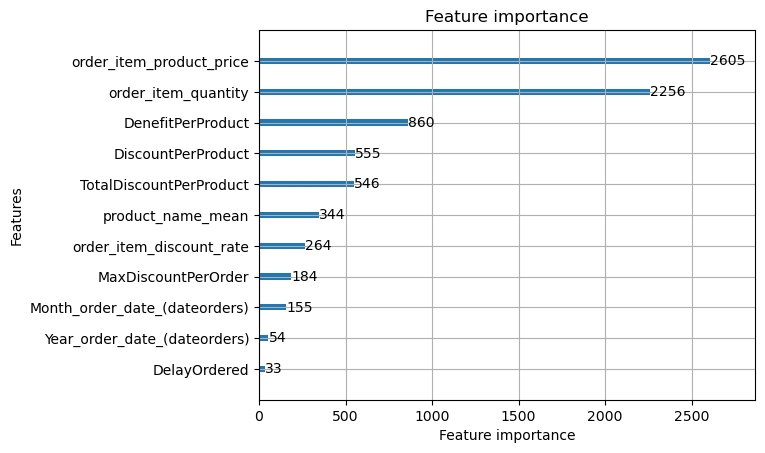

In [73]:
import matplotlib.pyplot as plt
lgb.plot_importance(model_1, max_num_features=11)
plt.show()

# Results Interpertaion

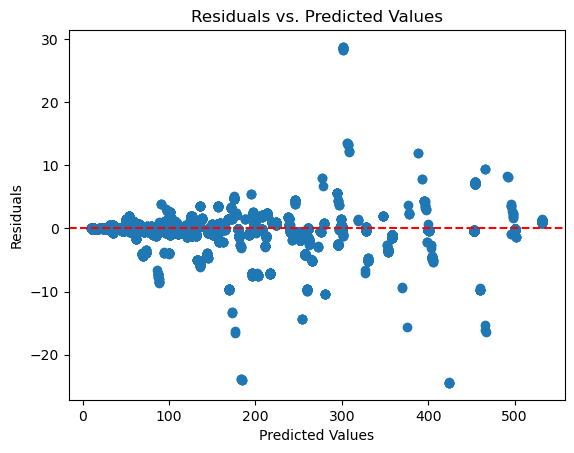

In [74]:
residuals =   y_test - prediction
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

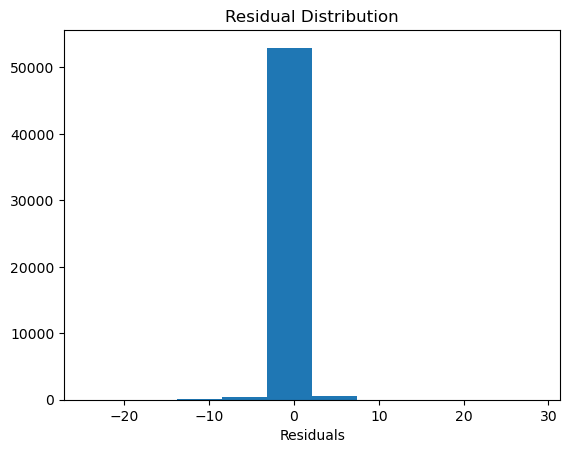

In [75]:
plt.hist(residuals, bins=10)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

<Axes: ylabel='Density'>

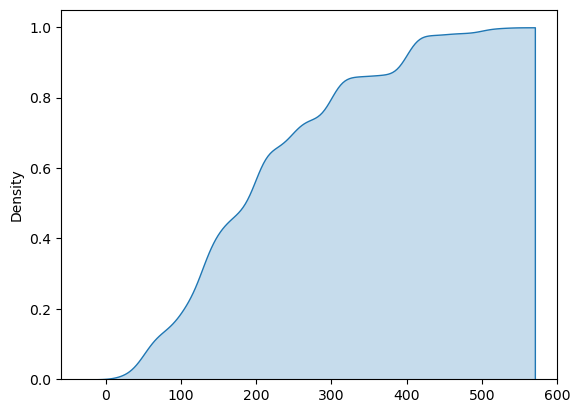

In [76]:
sns.kdeplot(prediction,fill=True,cumulative=True)

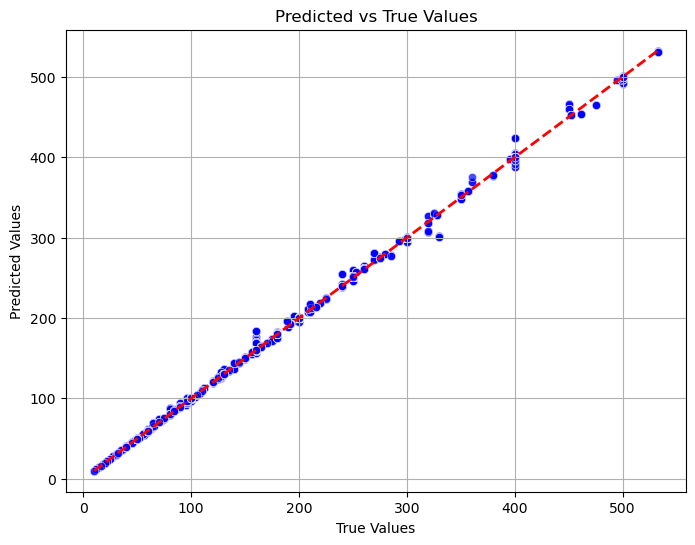

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediction, alpha=0.7, color="blue")  # True vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)  # y=x line
plt.title("Predicted vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Save the Model and Transformer for Deployment

In [50]:
# Save the model
model_1.save_model("Lgb_Model.txt")

In [79]:
# Save the piplines
from sklearn.preprocessing import FunctionTransformer

# The lable Encoder function
def lable_encoder(df):
    for col in cat:
       le = LabelEncoder()
       df[col] = le.fit_transform(df[col])
    return df 


Transformer = ColumnTransformer(
        
            transformers = [ 

            ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num),
            ('cat', FunctionTransformer(lable_encoder, validate=False), cat)]
            ,verbose_feature_names_out=False,    remainder='passthrough' )


pipeline = Pipeline(steps=[
    ('preprocessor', Transformer),
    ('model', model_1)
])


import pickle

with open('lgb_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
